In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib
import warnings
import random  # Import the random module

warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv("D:\MajorProject\MajorProject\RiskAssess\Dataset\Training.csv").dropna(axis=1)

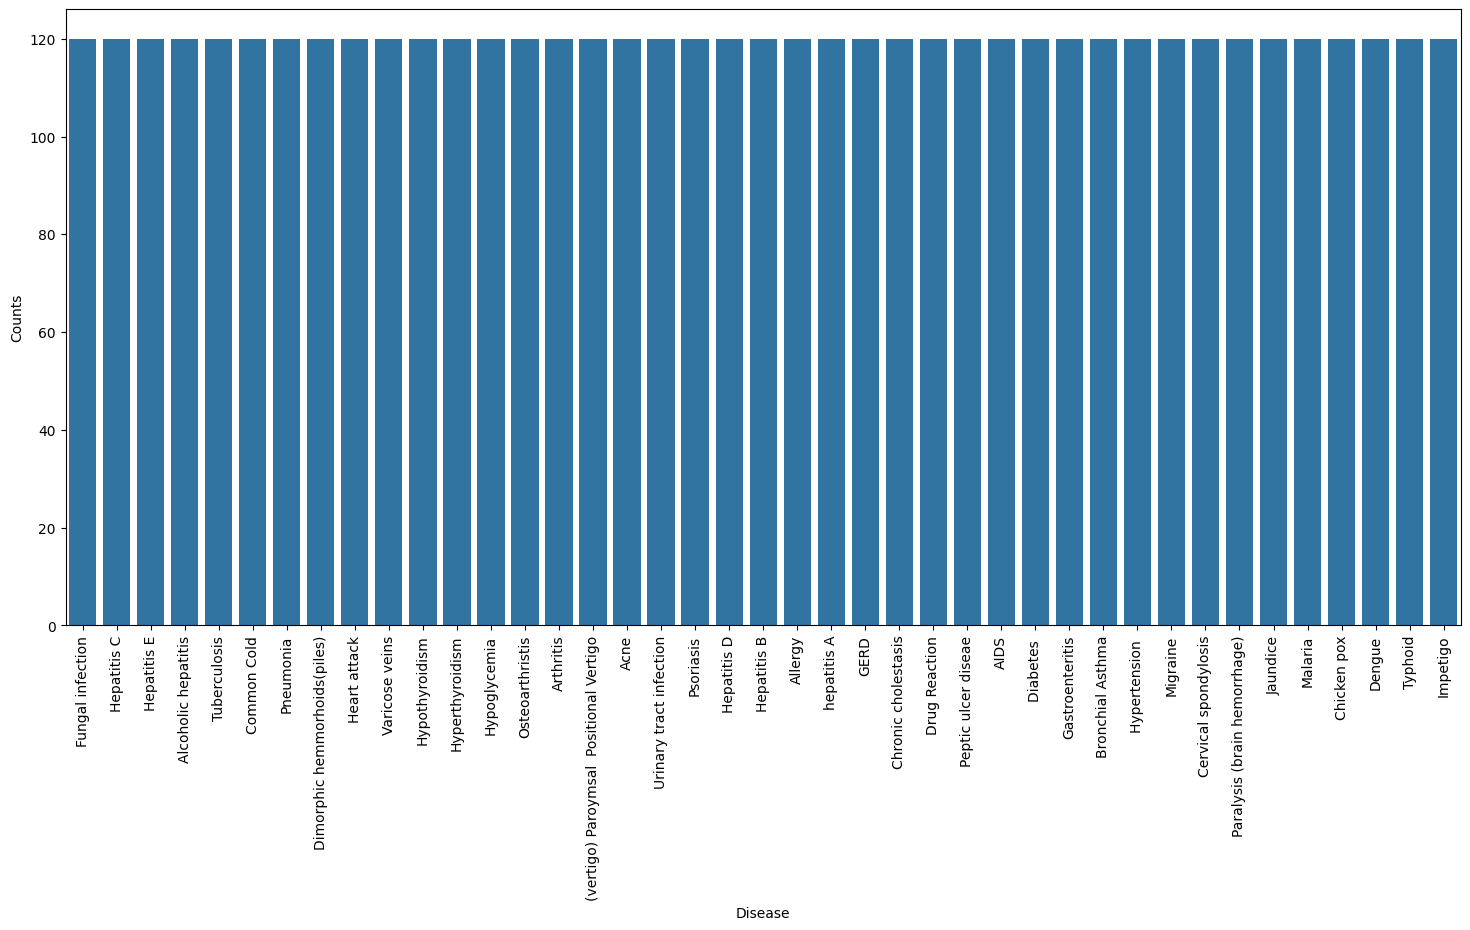

In [3]:
# Visualize the disease counts
disease_counts = data['prognosis'].value_counts()
temp_df = pd.DataFrame({"Disease": disease_counts.index, "Counts": disease_counts.values})

plt.figure(figsize=(18,8))
sns.barplot(x='Disease', y='Counts', data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [4]:
# Encode the target variable
encoder = LabelEncoder()
data['prognosis'] = encoder.fit_transform(data['prognosis'])
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

In [5]:
# Split the data into features and target variable
X = data.drop('prognosis', axis=1)
y = data['prognosis']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [7]:
# Define a function for cross-validation scoring
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

In [8]:
# Define the models to train
models = {
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "RandomForest": RandomForestClassifier(random_state=18)
}

In [9]:
# Evaluate the models using cross-validation
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv=10, n_jobs=-1, scoring=cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
RandomForest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by Random Forest Classifier: 100.00%
Accuracy on test data by Random Forest Classifier: 100.00%


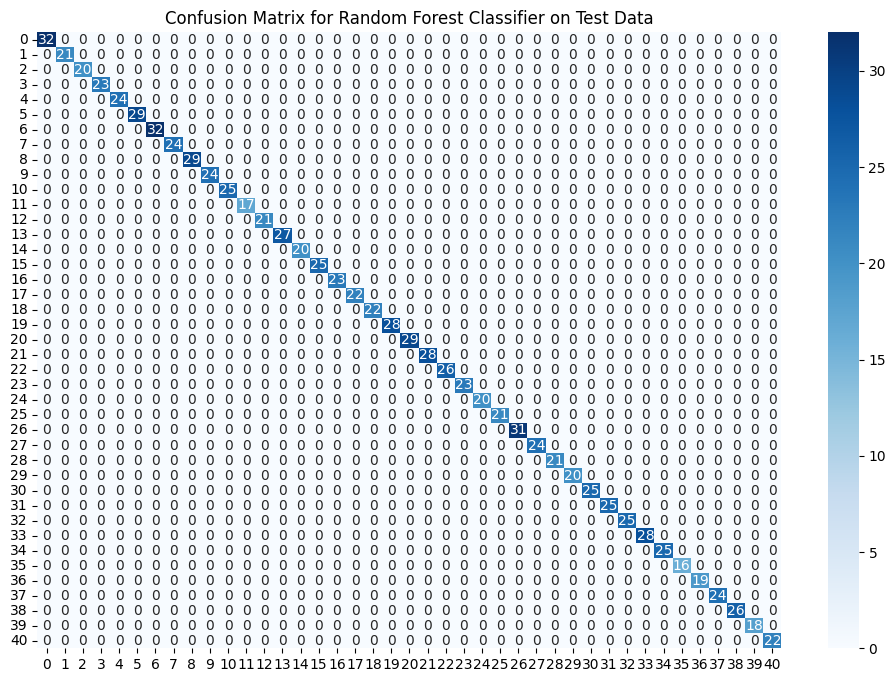

In [10]:
# Train and evaluate the Random Forest model
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

print(f"Accuracy on train data by Random Forest Classifier: {accuracy_score(y_train, rf_model.predict(X_train)) * 100:.2f}%")
print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_test, preds) * 100:.2f}%")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

In [11]:
import pickle
filename = 'health_model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))